In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
file_path ="/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [13]:
df.dropna(inplace=True)

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

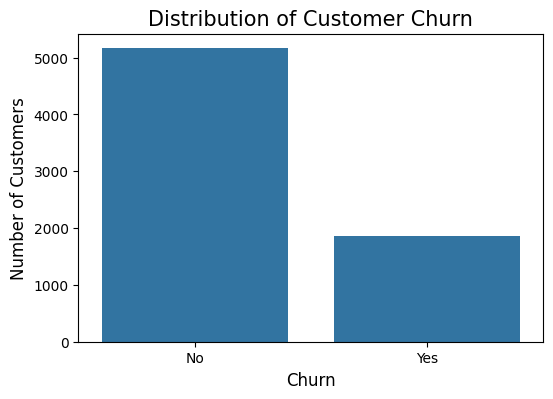

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Churn' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

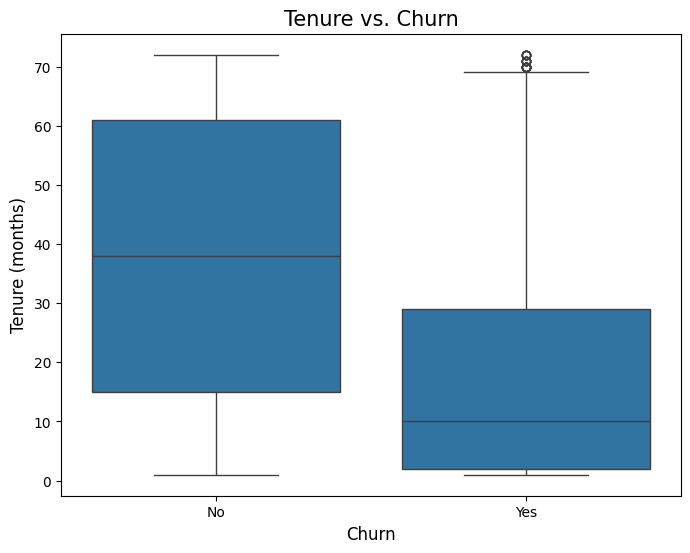

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs. Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Tenure (months)', fontsize=12)
plt.show()

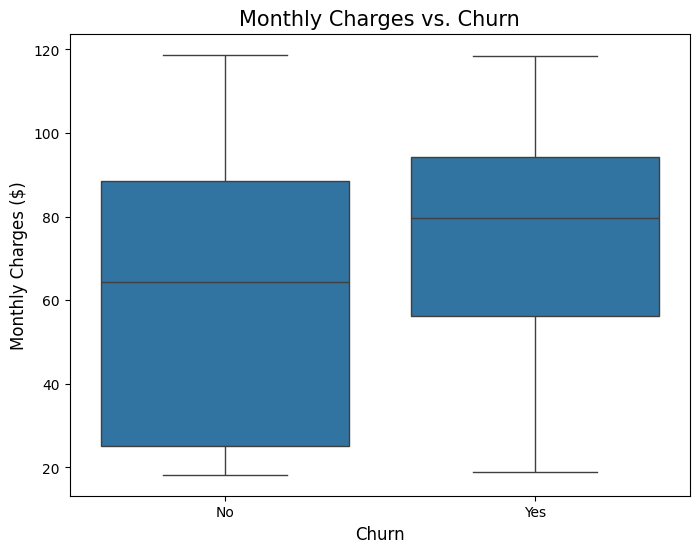

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs. Churn', fontsize=15)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.show()

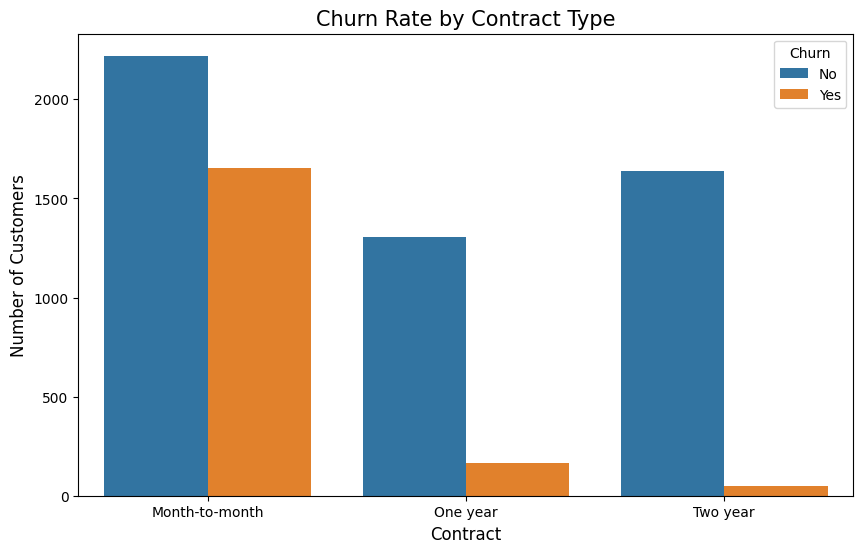

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type', fontsize=15)
plt.xlabel('Contract', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# PASTE YOUR CORRECT FILE PATH HERE
file_path = '/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Step 1: Load and Clean the Data
df = pd.read_csv(file_path)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Step 2: Feature Engineering (One-Hot Encoding)
df.drop('customerID', axis=1, inplace=True)
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 3: Split the Data
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to confirm everything worked
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5625, 30)
Shape of X_test: (1407, 30)
Shape of y_train: (5625,)
Shape of y_test: (1407,)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[927 106]
 [196 178]]

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the performance of the tuned model
print("\nConfusion Matrix for Tuned Model:")
print(confusion_matrix(y_test, y_pred_tuned))

print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
Best cross-validation accuracy:  0.8067555555555556

Confusion Matrix for Tuned Model:
[[934  99]
 [193 181]]

Classification Report for Tuned Model:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [25]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the XGBoost Classifier
# We set a random_state for reproducibility
xgb_model = xgb.XGBClassifier(n_estimators=150,
                              learning_rate=0.1,
                              use_label_encoder=False,
                              eval_metric='logloss',
                              random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:24:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Confusion Matrix:
[[925 108]
 [189 185]]

XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [26]:
!pip install imbalanced-learn

In [27]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Before SMOTE
print("Shape of training data before SMOTE:", X_train.shape)
print("Distribution of Churn before SMOTE:\n", pd.Series(y_train).value_counts())

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# After SMOTE
print("\nShape of training data after SMOTE:", X_train_resampled.shape)
print("Distribution of Churn after SMOTE:\n", pd.Series(y_train_resampled).value_counts())

Shape of training data before SMOTE: (5625, 30)
Distribution of Churn before SMOTE:
 Churn_Yes
False    4130
True     1495
Name: count, dtype: int64

Shape of training data after SMOTE: (8260, 30)
Distribution of Churn after SMOTE:
 Churn_Yes
True     4130
False    4130
Name: count, dtype: int64


In [28]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the XGBoost Classifier
xgb_model_smote = xgb.XGBClassifier(n_estimators=150,
                                     learning_rate=0.1,
                                     use_label_encoder=False,
                                     eval_metric='logloss',
                                     random_state=42)

# Train the model on the SMOTE-resampled data
xgb_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test data
y_pred_smote = xgb_model_smote.predict(X_test)

# Evaluate the model's performance
print("XGBoost with SMOTE Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))

print("\nXGBoost with SMOTE Classification Report:")
print(classification_report(y_test, y_pred_smote))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:25:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost with SMOTE Confusion Matrix:
[[842 191]
 [147 227]]

XGBoost with SMOTE Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.82      0.83      1033
        True       0.54      0.61      0.57       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.76      0.76      1407



In [29]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model_smote, 'churn_model.pkl')

print("Model saved to churn_model.pkl")

Model saved to churn_model.pkl
